In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db_raw = pd.read_excel('datasets/sales.xls', header=None)

# Time intervals

In [3]:
db_data_month = db_raw.drop([0,1], axis=0)
db_data_year = db_raw.drop([0,1], axis=0)

In [4]:
db_data_month['month'] = db_data_month[0].dt.month
db_data_year['year'] = db_data_year[0].dt.year

In [5]:
sales_month = db_data_month.groupby('month').sum()
sales_year = db_data_year.groupby('year').sum()

# Shops

In [6]:
shops = db_raw.transpose()[[0,1]].drop([0], axis=0)

In [7]:
shops.rename(columns = {0:'shop', 1:'product'}, inplace=True)

In [8]:
for i in range(1,21,1):
    shops['shop'][2*i] = shops['shop'][2*i-1]

# Month

In [9]:
tr_sales_month = sales_month.transpose()
tr_sales_year = sales_year.transpose()

In [10]:
monthly_sales_per_shop = pd.concat([shops, tr_sales_month], axis=1).set_index(['shop', 'product']).transpose()
yearly_sales_per_shop = pd.concat([shops, tr_sales_year], axis=1)

In [11]:
monthly_sales_per_shop

shop      S1        S2        S3        S4        S5       ...  S16       S17  \
product   P1   P2   P1   P2   P1   P2   P1   P2   P1   P2  ...   P1   P2   P1   
1.0       49  167   51  156   69  177   65  217   57  145  ...  166  324  110   
2.0       82   92   74   99  125  117  103  120  100   99  ...  266  224  147   
3.0      118   43  124   56  174   79  185   83  166   66  ...  385  133  232   
4.0      185   26  164   28  243   38  203   37  153   27  ...  475   68  297   
5.0      193    0  214    1  241    4  263    8  213    1  ...  489   18  250   
6.0      181    0  150    0  228    0  254    0  167    0  ...  449    0  352   
7.0      194    0  184    1  258    7  222   12  192    1  ...  525   18  324   
8.0      185   29  203   28  224   41  207   40  213   29  ...  507   70  288   
9.0      138   50  120   54  197   64  176   75  122   58  ...  364  161  204   
10.0     111  100  111   99  154  148  136  104  107  117  ...  241  219  167   
11.0      48  121   44  149   64  195   57  182   52  141  ...  133  350   79   
12.0       0  168    0  233    0  288    0  274    0  192  ...    0  542    0   

shop          S18       S19       S20       
product   P2   P1   P2   P1   P2   P1   P2  
1.0      287   65  203   50  163   64  203  
2.0      126  102  115   99   81   96  119  
3.0      100  186   69  156   59  211   71  
4.0       36  262   43  153   33  258   38  
5.0       11  223    6  189    0  271    7  
6.0        0  251    0  199    0  217    0  
7.0       11  250    8  141    0  250    5  
8.0       43  216   26  149   23  236   29  
9.0       74  166   77  119   61  218   68  
10.0     134  133  125   93   88  146  126  
11.0     246   64  203   37  158   47  172  
12.0     360    0  208    0  204    0  275  

[12 rows x 40 columns]

In [12]:
av_daily_per_month = monthly_sales_per_shop/(6*4)

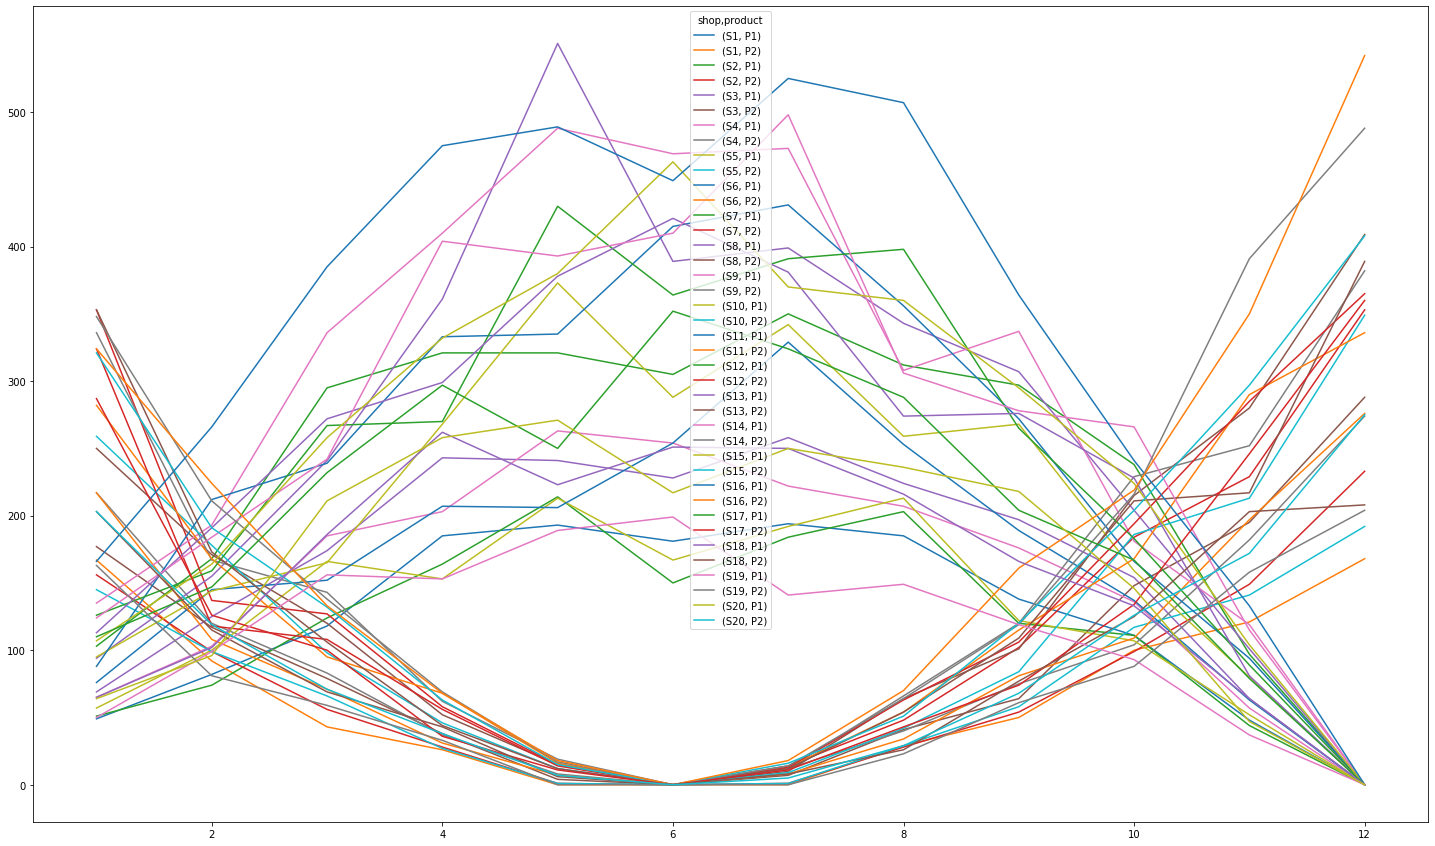

In [13]:
monthly_sales_per_shop[monthly_sales_per_shop.columns[0:40]].plot(figsize=(25,15));

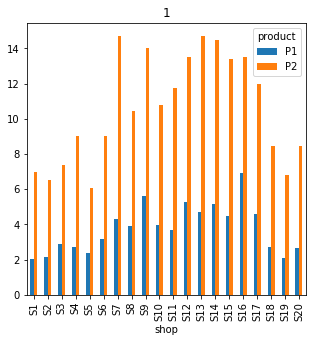

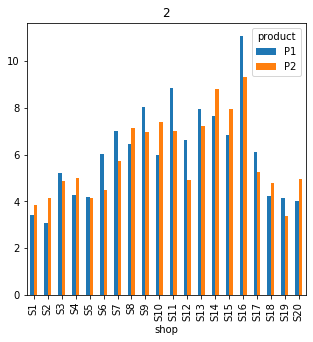

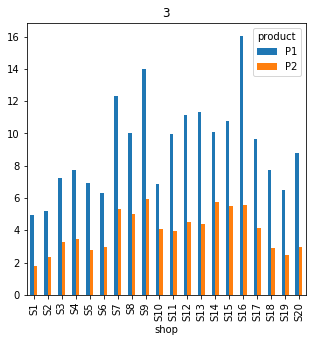

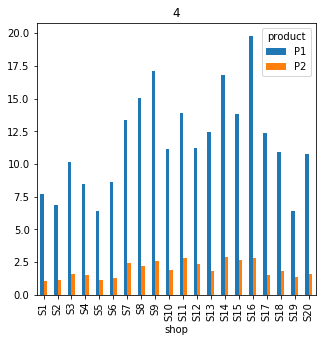

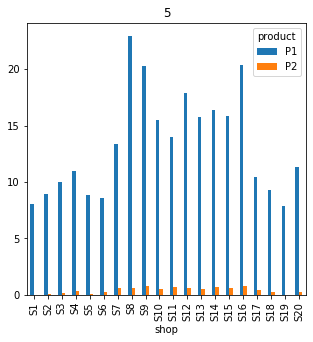

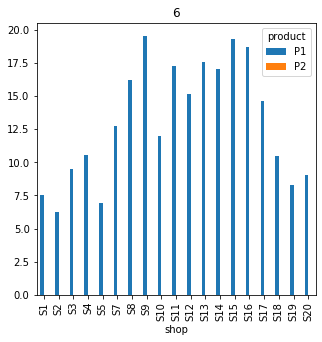

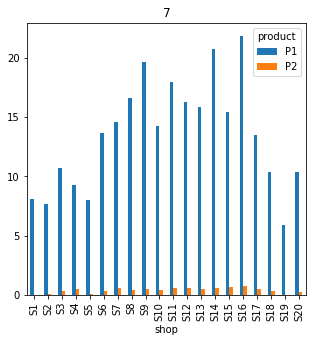

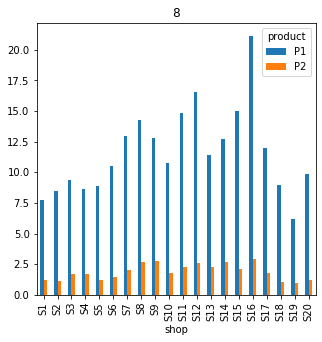

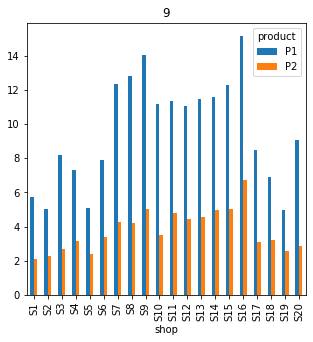

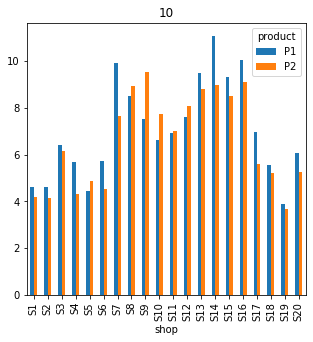

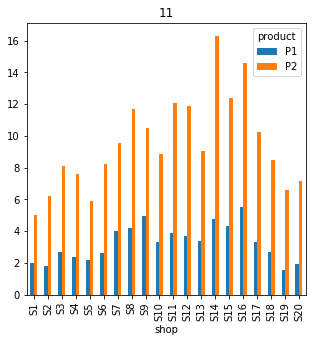

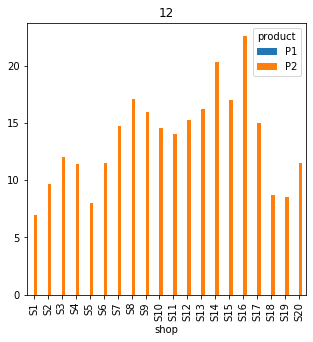

In [14]:
for i in range(1,13,1):
    monthly_per_month = av_daily_per_month.transpose()[i]
    month_good_order_plot = monthly_per_month.unstack().reindex(monthly_per_month.index.get_level_values(0)).drop_duplicates()
    month_good_order_plot.plot(kind='bar', figsize=(5,5), title = i);
    

In [15]:
rounded_av_daily_per_month = av_daily_per_month.apply(np.ceil)

In [16]:

for num_s in range(1,21,1):
    rounded_av_daily_per_month[('S'+str(num_s), 'P1')] = rounded_av_daily_per_month[('S'+str(num_s), 'P1')]*0.8
    rounded_av_daily_per_month[('S'+str(num_s), 'P2')] = rounded_av_daily_per_month[('S'+str(num_s), 'P2')]*0.4

In [17]:
rounded_av_daily_per_month

shop      S1        S2        S3        S4        S5       ...   S16       \
product   P1   P2   P1   P2   P1   P2   P1   P2   P1   P2  ...    P1   P2   
1.0      2.4  2.8  2.4  2.8  2.4  3.2  2.4  4.0  2.4  2.8  ...   5.6  5.6   
2.0      3.2  1.6  3.2  2.0  4.8  2.0  4.0  2.0  4.0  2.0  ...   9.6  4.0   
3.0      4.0  0.8  4.8  1.2  6.4  1.6  6.4  1.6  5.6  1.2  ...  13.6  2.4   
4.0      6.4  0.8  5.6  0.8  8.8  0.8  7.2  0.8  5.6  0.8  ...  16.0  1.2   
5.0      7.2  0.0  7.2  0.4  8.8  0.4  8.8  0.4  7.2  0.4  ...  16.8  0.4   
6.0      6.4  0.0  5.6  0.0  8.0  0.0  8.8  0.0  5.6  0.0  ...  15.2  0.0   
7.0      7.2  0.0  6.4  0.4  8.8  0.4  8.0  0.4  6.4  0.4  ...  17.6  0.4   
8.0      6.4  0.8  7.2  0.8  8.0  0.8  7.2  0.8  7.2  0.8  ...  17.6  1.2   
9.0      4.8  1.2  4.0  1.2  7.2  1.2  6.4  1.6  4.8  1.2  ...  12.8  2.8   
10.0     4.0  2.0  4.0  2.0  5.6  2.8  4.8  2.0  4.0  2.0  ...   8.8  4.0   
11.0     1.6  2.4  1.6  2.8  2.4  3.6  2.4  3.2  2.4  2.4  ...   4.8  6.0   
12.0     0.0  2.8  0.0  4.0  0.0  4.8  0.0  4.8  0.0  3.2  ...   0.0  9.2   

shop      S17       S18       S19       S20       
product    P1   P2   P1   P2   P1   P2   P1   P2  
1.0       4.0  4.8  2.4  3.6  2.4  2.8  2.4  3.6  
2.0       5.6  2.4  4.0  2.0  4.0  1.6  3.2  2.0  
3.0       8.0  2.0  6.4  1.2  5.6  1.2  7.2  1.2  
4.0      10.4  0.8  8.8  0.8  5.6  0.8  8.8  0.8  
5.0       8.8  0.4  8.0  0.4  6.4  0.0  9.6  0.4  
6.0      12.0  0.0  8.8  0.0  7.2  0.0  8.0  0.0  
7.0      11.2  0.4  8.8  0.4  4.8  0.0  8.8  0.4  
8.0       9.6  0.8  7.2  0.8  5.6  0.4  8.0  0.8  
9.0       7.2  1.6  5.6  1.6  4.0  1.2  8.0  1.2  
10.0      5.6  2.4  4.8  2.4  3.2  1.6  5.6  2.4  
11.0      3.2  4.4  2.4  3.6  1.6  2.8  1.6  3.2  
12.0      0.0  6.0  0.0  3.6  0.0  3.6  0.0  4.8  

[12 rows x 40 columns]

In [18]:
vol_av_daily_per_month = rounded_av_daily_per_month.transpose().groupby('shop').sum()

In [19]:
vol_av_daily_per_month.reindex(monthly_per_month.index.get_level_values(0)).drop_duplicates()

,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
shop,,,,,,,,,,,,
S1,5.2,4.8,4.8,7.2,7.2,6.4,7.2,7.2,6.0,6.0,4.0,2.8
S2,5.2,5.2,6.0,6.4,7.6,5.6,6.8,8.0,5.2,6.0,4.4,4.0
S3,5.6,6.8,8.0,9.6,9.2,8.0,9.2,8.8,8.4,8.4,6.0,4.8
S4,6.4,6.0,8.0,8.0,9.2,8.8,8.4,8.0,8.0,6.8,5.6,4.8
S5,5.2,6.0,6.8,6.4,7.6,5.6,6.8,8.0,6.0,6.0,4.8,3.2
S6,7.2,7.6,6.8,8.0,7.6,8.8,11.6,9.6,8.0,6.8,6.0,4.8
S7,10.0,8.0,12.8,12.4,11.6,10.4,12.4,11.2,12.4,11.2,8.0,6.0
S8,7.6,8.8,10.8,14.0,18.8,13.6,14.0,13.2,12.4,10.8,8.8,7.2
S9,10.4,10.0,13.6,15.6,17.2,16.0,16.4,11.6,14.0,10.4,8.4,6.4


# average weekly per month

In [20]:
av_weekly_per_month = monthly_sales_per_shop/(4)

In [21]:
av_weekly_per_month

shop        S1            S2            S3            S4            S5         \
product     P1     P2     P1     P2     P1     P2     P1     P2     P1     P2   
1.0      12.25  41.75  12.75  39.00  17.25  44.25  16.25  54.25  14.25  36.25   
2.0      20.50  23.00  18.50  24.75  31.25  29.25  25.75  30.00  25.00  24.75   
3.0      29.50  10.75  31.00  14.00  43.50  19.75  46.25  20.75  41.50  16.50   
4.0      46.25   6.50  41.00   7.00  60.75   9.50  50.75   9.25  38.25   6.75   
5.0      48.25   0.00  53.50   0.25  60.25   1.00  65.75   2.00  53.25   0.25   
6.0      45.25   0.00  37.50   0.00  57.00   0.00  63.50   0.00  41.75   0.00   
7.0      48.50   0.00  46.00   0.25  64.50   1.75  55.50   3.00  48.00   0.25   
8.0      46.25   7.25  50.75   7.00  56.00  10.25  51.75  10.00  53.25   7.25   
9.0      34.50  12.50  30.00  13.50  49.25  16.00  44.00  18.75  30.50  14.50   
10.0     27.75  25.00  27.75  24.75  38.50  37.00  34.00  26.00  26.75  29.25   
11.0     12.00  30.25  11.00  37.25  16.00  48.75  14.25  45.50  13.00  35.25   
12.0      0.00  42.00   0.00  58.25   0.00  72.00   0.00  68.50   0.00  48.00   

shop     ...     S16            S17           S18           S19           S20  \
product  ...      P1      P2     P1     P2     P1     P2     P1     P2     P1   
1.0      ...   41.50   81.00  27.50  71.75  16.25  50.75  12.50  40.75  16.00   
2.0      ...   66.50   56.00  36.75  31.50  25.50  28.75  24.75  20.25  24.00   
3.0      ...   96.25   33.25  58.00  25.00  46.50  17.25  39.00  14.75  52.75   
4.0      ...  118.75   17.00  74.25   9.00  65.50  10.75  38.25   8.25  64.50   
5.0      ...  122.25    4.50  62.50   2.75  55.75   1.50  47.25   0.00  67.75   
6.0      ...  112.25    0.00  88.00   0.00  62.75   0.00  49.75   0.00  54.25   
7.0      ...  131.25    4.50  81.00   2.75  62.50   2.00  35.25   0.00  62.50   
8.0      ...  126.75   17.50  72.00  10.75  54.00   6.50  37.25   5.75  59.00   
9.0      ...   91.00   40.25  51.00  18.50  41.50  19.25  29.75  15.25  54.50   
10.0     ...   60.25   54.75  41.75  33.50  33.25  31.25  23.25  22.00  36.50   
11.0     ...   33.25   87.50  19.75  61.50  16.00  50.75   9.25  39.50  11.75   
12.0     ...    0.00  135.50   0.00  90.00   0.00  52.00   0.00  51.00   0.00   

shop            
product     P2  
1.0      50.75  
2.0      29.75  
3.0      17.75  
4.0       9.50  
5.0       1.75  
6.0       0.00  
7.0       1.25  
8.0       7.25  
9.0      17.00  
10.0     31.50  
11.0     43.00  
12.0     68.75  

[12 rows x 40 columns]

# Year

In [22]:
yearly_sales_per_shop.rename(columns = {2015.0:'value'},inplace=True)
year_final = yearly_sales_per_shop.set_index(['shop', 'product']).value

In [23]:
year_good_order_plot = year_final.unstack().reindex(year_final.index.get_level_values(0)).drop_duplicates()
av_daily_per_year = year_good_order_plot/(6*52)
av_daily_per_year

product,P1,P2
shop,,
S1,4.756410,2.551282
S2,4.612179,2.897436
S3,6.336538,3.711538
S4,5.996795,3.692308
S5,4.942308,2.807692
S6,6.445513,3.650641
S7,8.996795,5.192308
S8,10.080128,5.407051
S9,11.054487,5.730769


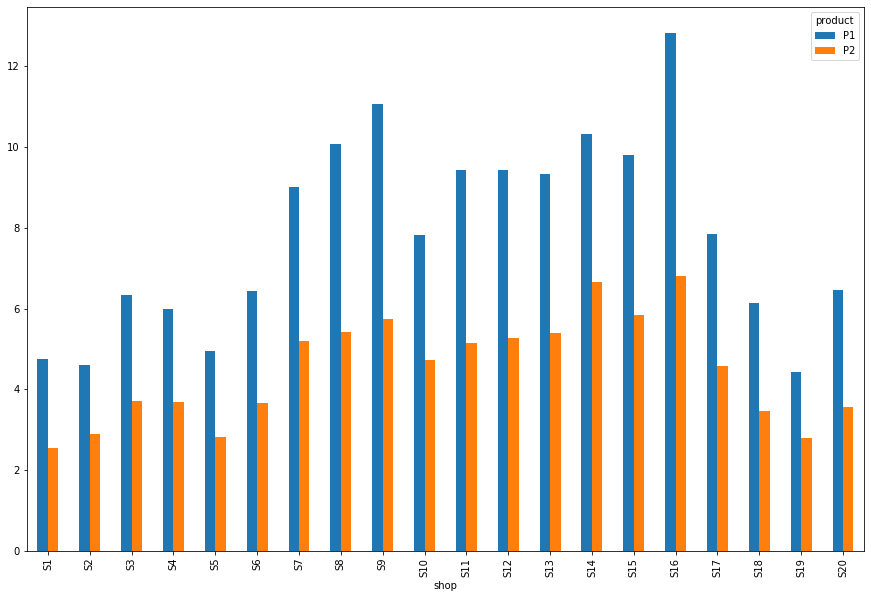

In [24]:
av_daily_per_year.plot(kind='bar', figsize=(15,10));